In [50]:
import pandas as pd
import numpy as np
from pandas_datareader import data,wb
import datetime
import matplotlib.pyplot as plt
from scipy import stats

In [51]:
start=datetime.datetime(2015,12,29)
end=datetime.datetime(2019,1,1)
CheckingUp=datetime.datetime(2015,12,29)
CheckingDown=datetime.datetime(2019,1,1)
RiskFreeRate=data.DataReader('^TNX','yahoo',start=start,end=end)
B1=datetime.datetime(2018,1,1)
B2=datetime.datetime(2019,1,1)
TotalMoney=28400000
OnGoingCharge=np.array([0.0178,0.0177,0.018,0.0178,0.0174,0.0174,0.0181,0.0101,0.0142,0.006,0.0116])
InitialFee=np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.03,0.03,0.03,0.03])

In [52]:
US_Tech=pd.read_csv(r'C:\Users\linzi\Desktop\Quant Finance\JP Morgan\Data\Equity\US_Tech.csv',dayfirst=True,parse_dates=True,index_col='Date')
USA=pd.read_csv(r'C:\Users\linzi\Desktop\Quant Finance\JP Morgan\Data\Equity\USA.csv',dayfirst=True,parse_dates=True,index_col='Date')
EU=data.DataReader('IEUR','yahoo',start=start,end=end)['Adj Close']
JPN=pd.read_csv(r'C:\Users\linzi\Desktop\Quant Finance\JP Morgan\Data\Equity\JPN.csv',dayfirst=True,parse_dates=True,index_col='Date')
CHN=pd.read_csv(r'C:\Users\linzi\Desktop\Quant Finance\JP Morgan\Data\Equity\CHN.csv',dayfirst=True,parse_dates=True,index_col='Date')
AsiaPacific=pd.read_csv(r'C:\Users\linzi\Desktop\Quant Finance\JP Morgan\Data\Equity\AsiaPacific.csv',dayfirst=True,parse_dates=True,index_col='Date')
EM_Equity=pd.read_csv(r'C:\Users\linzi\Desktop\Quant Finance\JP Morgan\Data\Equity\EM_Equity.csv',dayfirst=True,parse_dates=True,index_col='Date')
AggregateBond=pd.read_csv(r'C:\Users\linzi\Desktop\Quant Finance\JP Morgan\Data\Bond\AggregateBond.csv',index_col='Date',dayfirst=True,parse_dates=True)
HighYield=data.DataReader('JNK','yahoo',start=start,end=end)['Adj Close']
GlobalGovernment=data.DataReader('ZROZ','yahoo',start=start,end=end)['Adj Close']
EM_debt=data.DataReader('EMB','yahoo',start=start,end=end)['Adj Close']
TradingDays=np.array((len(US_Tech[B1:B2]),len(AsiaPacific[B1:B2]),len(CHN[B1:B2]),len(EM_Equity[B1:B2]),len(EU[B1:B2]),len(JPN[B1:B2]),len(USA[B1:B2]),len(AggregateBond[B1:B2]),len(EM_debt[B1:B2]),len(GlobalGovernment[B1:B2]),len(HighYield[B1:B2])))

In [53]:
def YearIndex(Start,End):
    MyList=list()
    d=Start
    Delta=datetime.timedelta(days=1)
    while(d<=End):
        MyList.append(d)
        d=d+Delta
    return MyList
Index=YearIndex(CheckingUp,CheckingDown)
AsiaPacific=AsiaPacific[CheckingUp:CheckingDown]
AsiaPacific=AsiaPacific.reindex(Index)
CHN=CHN[CheckingUp:CheckingDown]
CHN=CHN.reindex(Index)
EM_Equity=EM_Equity[CheckingUp:CheckingDown]
EM_Equity=EM_Equity.reindex(Index)
EU=EU[CheckingUp:CheckingDown]
EU=EU.reindex(Index)
JPN=JPN[CheckingUp:CheckingDown]
JPN=JPN.reindex(Index)
USA=USA[CheckingUp:CheckingDown]
USA=USA.reindex(Index)
US_Tech=US_Tech[CheckingUp:CheckingDown]
US_Tech=US_Tech.reindex(Index)
AggregateBond=AggregateBond[CheckingUp:CheckingDown]
AggregateBond=AggregateBond.reindex(Index)
EM_debt=EM_debt[CheckingUp:CheckingDown]
EM_debt=EM_debt.reindex(Index)
GlobalGovernment=GlobalGovernment[CheckingUp:CheckingDown]
GlobalGovernment=GlobalGovernment.reindex(Index)
HighYield=HighYield[CheckingUp:CheckingDown]
HighYield=HighYield.reindex(Index)
AsiaPacific=AsiaPacific.fillna(method='pad')
CHN=CHN.fillna(method='pad')
EM_Equity=EM_Equity.fillna(method='pad')
EU=EU.fillna(method='pad')
JPN=JPN.fillna(method='pad')
USA=USA.fillna(method='pad')
US_Tech=US_Tech.fillna(method='pad')
AggregateBond=AggregateBond.fillna(method='pad')
EM_debt=EM_debt.fillna(method='pad')
GlobalGovernment=GlobalGovernment.fillna(method='pad')
HighYield=HighYield.fillna(method='pad')
TradingDays

array([247, 247, 239, 252, 251, 253, 247, 245, 251, 251, 251])

In [54]:
Equity=np.column_stack((US_Tech.tail(len(US_Tech)-2).pct_change()[1:],AsiaPacific.tail(len(AsiaPacific)-2).pct_change()[1:],CHN.tail(len(CHN)-2).pct_change()[1:],USA.tail(len(USA)-2).pct_change()[1:],EM_Equity.tail(len(EM_Equity)-2).pct_change()[1:],JPN.tail(len(JPN)-2).pct_change()[1:],EU.tail(len(EU)-2).pct_change()[1:]))
EquityClass=pd.DataFrame(data=Equity,columns=['US_Tech','AsiaPacific','CHN','USA','EM_equity','JPN','EU'])
Debt=np.column_stack((AggregateBond.tail(len(AggregateBond)-2).pct_change()[1:],EM_debt.tail(len(EM_debt)-2).pct_change()[1:],GlobalGovernment.tail(len(GlobalGovernment)-2).pct_change()[1:],HighYield.tail(len(HighYield)-2).pct_change()[1:]))
BondClass=pd.DataFrame(data=Debt,columns=['AggregateBond','EM_debt','GlobalGovernment','HighYield'])

In [55]:
ReturnEquity=Equity.T
ReturnBond=Debt.T
Equity_Bond=np.concatenate((ReturnEquity,ReturnBond))
Mean=(np.prod(ReturnEquity+1,axis=1))**(1/3)
Bond_Means=np.array([0.025,0.066,0.0296,0.065])
Mean=Mean-1
Means=np.concatenate((Mean,Bond_Means))
print(Means)

[ 0.16812564  0.09499763 -0.05377392  0.07455095  0.11233169  0.09697555
  0.02357968  0.025       0.066       0.0296      0.065     ]


In [86]:
def AssetsAllocation(ReturnVector,Allocation):
    k=np.random.rand(ReturnVector.shape[0])
    if (ReturnVector.shape[0]>5):
        EquityWeights=(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]+k[6])
        while (((k[0]/EquityWeights>0.25))&(k[0]/EquityWeights<0.6)&(k[4]/EquityWeights>0.2)&(k[5]/EquityWeights>0.2))==False:
            k=np.random.rand(ReturnVector.shape[0])
            EquityWeights=(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]+k[6])
    else:
        while(k[2]/sum(k)>0.1)&(k[1]/sum(k)>0.15)&(k[3]/sum(k)<0.3)==False:
            k=np.random.rand(ReturnVector.shape[0])
    return (k*Allocation/sum(k))  

In [87]:
def AssetsAllocation2(ReturnVector):
    k=np.random.rand(ReturnVector.shape[0])
    BondWeighted=(k[7]+k[8]+k[9]+k[10])/sum(k)
    EquityWeighted=(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]+k[6])/sum(k)
    while (((k[0]/EquityWeighted>0.4))&(BondWeighted>0.5)&(k[9]/sum(k)>0.1)&(k[4]/sum(k)>0.1)&(k[5]/sum(k)>0.1))== False:
        k=np.random.rand(ReturnVector.shape[0])
        BondWeighted=(k[7]+k[8]+k[9]+k[10])/sum(k)
        EquityWeighted=(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]+k[6])/sum(k)
    return k/sum(k)

In [88]:
def Contribution(CovarianceMartix,Weights,Std,Means):
    RiskContribution=np.zeros(CovarianceMartix.shape[0])
    ReturnContribution=np.zeros(CovarianceMartix.shape[0])
    for i in range(CovarianceMartix.shape[0]):
        RiskContribution[i]=(Weights[i]*sum(CovarianceMartix[i]*Weights))/Std/Std
        ReturnContribution[i]=(Weights[i]*Means[i])/(np.sum(Weights*Means))
    return RiskContribution,ReturnContribution

In [89]:
def Annual(Weights,Means,covariance,TradingDays):
    returns=np.sum(Weights*Means)
    std=np.sqrt(np.dot(Weights.T,np.dot(covariance,Weights)))*np.sqrt(365)
    return returns,std

In [90]:
def RandomPortfolio(Equity_Bond,ReturnEquity,ReturnBond,NumberPortfolio,RiskFreeRate,TradingDays):
    Covariance_Matrix=np.cov(Equity_Bond)#Return 10*10 Matrix
    Mean=(np.prod(ReturnEquity+1,axis=1))**(1/3)
    Bond_Means=np.array([0.025,0.066,0.001,0.065])
    Mean=Mean-1
    Means=np.concatenate((Mean,Bond_Means))
    Results=np.zeros((Equity_Bond.shape[0],NumberPortfolio))
    Weights_Record=np.zeros((NumberPortfolio,Equity_Bond.shape[0]))
    ReturnContribution=np.zeros((NumberPortfolio,Equity_Bond.shape[0]))
    RiskContribution=np.zeros((NumberPortfolio,Equity_Bond.shape[0]))
    for i in range(NumberPortfolio):
        WeightsE=AssetsAllocation(ReturnEquity,0.6)
        WeightsV=AssetsAllocation(ReturnBond,0.4)
        Weights=np.concatenate((WeightsE,WeightsV))
        Returns,Std=Annual(Weights,Means,Covariance_Matrix,TradingDays)
        DailyStd=Std/np.sqrt(365)
        RiskAttribute,ReturnAttribute=Contribution(Covariance_Matrix,Weights,DailyStd,Means)
        while (any(RiskAttribute>0.5))|(any(ReturnAttribute>0.5))|(Std>0.1):
            WeightsE=AssetsAllocation(ReturnEquity,0.6)
            WeightsV=AssetsAllocation(ReturnBond,0.4)
            Weights=np.concatenate((WeightsE,WeightsV))
            Returns,Std=Annual(Weights,Means,Covariance_Matrix,TradingDays)
            DailyStd=Std/np.sqrt(365)
            RiskAttribute,ReturnAttribute=Contribution(Covariance_Matrix,Weights,DailyStd,Means)
        for j in range (Equity_Bond.shape[0]):
            Weights_Record[i,j]=Weights[j]
            RiskContribution[i,j]=RiskAttribute[j]
            ReturnContribution[i,j]=ReturnAttribute[j]          
        SharpRatio=(Returns-(RiskFreeRate['Adj Close'].mean())/100)/Std
        Results[0,i]=Returns
        Results[1,i]=Std
        Results[2,i]=SharpRatio
    return Results,Weights_Record,RiskContribution,ReturnContribution

In [91]:
def OptimalPortfolio(Equity_Bond,ReturnEquity,ReturnBond,NumberPortfolio,RiskFreeRate,TradingDays):
    Results,WeightsRecord,RiskContribution,ReturnContribution=RandomPortfolio(Equity_Bond,ReturnEquity,ReturnBond,NumberPortfolio,RiskFreeRate,TradingDays)
    Index_MaxSharp=np.argmax(Results[2])
    SharpReturn=Results[0,Index_MaxSharp]
    StdReturn=Results[1,Index_MaxSharp]
    MaxSharp=Results[2,Index_MaxSharp]
    WeightsRecord=WeightsRecord[Index_MaxSharp]
    RiskRecord=RiskContribution[Index_MaxSharp]
    ReturnRecord=ReturnContribution[Index_MaxSharp]
    return Results,SharpReturn,StdReturn,MaxSharp,WeightsRecord,RiskRecord,ReturnRecord

In [92]:
Results,SharpReturn,StdReturn,MaxSharp,WeightsRecord,RiskRecord,ReturnRecord=OptimalPortfolio(Equity_Bond,ReturnEquity,ReturnBond,5000,RiskFreeRate,TradingDays)

Standard Deviation 0.0874
Expected Return 0.0929
Probability of losing money 0.1438
Annual Cash Flow Generated from fixed income 690034.0
Equity Weights: Technology: 0.1745, AsiaPacific: 0.0916
Equity Weights: CHN: 0.0032, USA: 0.038, EM_equity: 0.1216, JPN: 0.1552,EU: 0.0159
Bond Weights: Aggregate: 0.0146, EM_Debt: 0.3082, Government Bond: 0.0403,High Yield: 0.0369
Weights of Technology Fund in equity: 0.2907546995486198
Risk Contribution: Technology: 0.3231, AsiaPacific: 0.1213,CHN: 0.003, USA: 0.0446, EM_equity: 0.1836, JPN: 0.198, EU: 0.0115, Aggregate: 0.0003, EM_Debt: 0.0987, Government Bond: 0.0049,High Yield: 0.0112
Return Contribution: Technology: 0.3156, AsiaPacific: 0.0937,CHN: -0.0018, USA: 0.0305, EM_equity: 0.147, JPN: 0.162, EU: 0.004, Aggregate: 0.0039, EM_Debt: 0.2189, Government Bond: 0.0004,High Yield: 0.0258
Adjusted Return: 0.0914
Net Investment: 27207200.0
0.40000000000000013
1.0
[0.17445282 0.09164512 0.00318169 0.03797127 0.12157742 0.15523973
 0.01593196 0.014

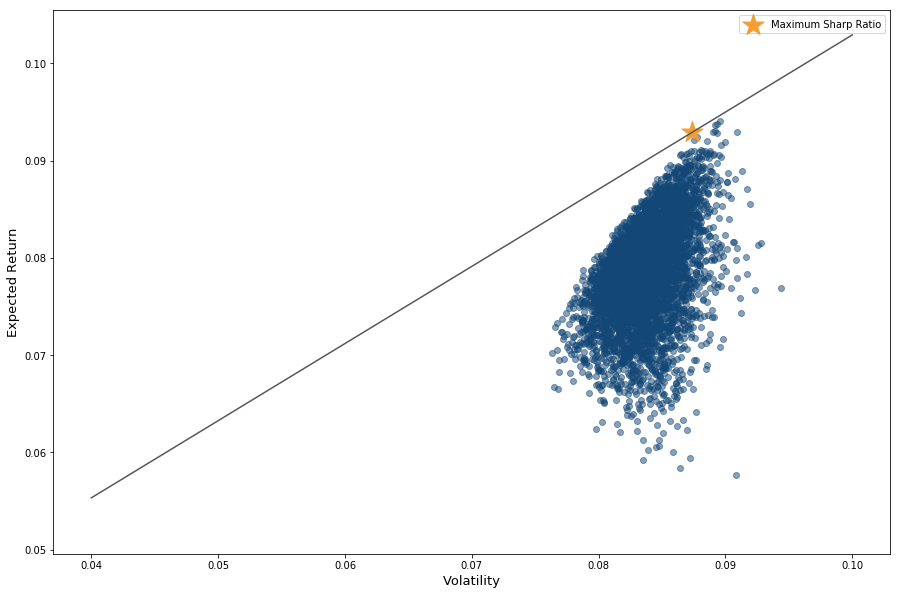

In [93]:
plt.rcParams['font.style']='normal'
NetInvestment=sum(TotalMoney*WeightsRecord*(1-InitialFee))
AdjustedReturn=sum(ReturnRecord*(1-OnGoingCharge))*SharpReturn
plt.scatter(Results[1],Results[0],alpha=0.5,color='#134776')
plt.scatter(StdReturn,SharpReturn,marker='*',s=500,label='Maximum Sharp Ratio',color='#F39D32')
plt.xlabel('Volatility',fontsize=13,)
plt.ylabel('Expected Return',fontsize=13)
plt.rcParams['figure.figsize']=15,10
x=np.linspace(0.04,0.1,10000)
y=x*MaxSharp+RiskFreeRate['Adj Close'].mean()/100
plt.plot(x,y,color='#585658')
plt.legend()
NormalDistribution=stats.norm(SharpReturn,StdReturn)
print('Standard Deviation {}'.format(round(StdReturn,4)))
print('Expected Return {}'.format(round(SharpReturn,4)))
print('Probability of losing money {}'.format(round(NormalDistribution.cdf(0),4)))
print('Annual Cash Flow Generated from fixed income {}'.format(round(sum(WeightsRecord[7:12]*TotalMoney*Bond_Means)),1))
print('Equity Weights: Technology: {}, AsiaPacific: {}'.format(round(WeightsRecord[0],4),round(WeightsRecord[1],4)))
print('Equity Weights: CHN: {}, USA: {}, EM_equity: {}, JPN: {},EU: {}'.format(round(WeightsRecord[2],4),round(WeightsRecord[3],4),round(WeightsRecord[4],4),round(WeightsRecord[5],4),round(WeightsRecord[6],4)))
print('Bond Weights: Aggregate: {}, EM_Debt: {}, Government Bond: {},High Yield: {}'.format(round(WeightsRecord[7],4),round(WeightsRecord[8],4),round(WeightsRecord[9],4),round(WeightsRecord[10],4)))
print('Weights of Technology Fund in equity: {}'.format(WeightsRecord[0]/sum(WeightsRecord[0:7])))
print('Risk Contribution: Technology: {}, AsiaPacific: {},CHN: {}, USA: {}, EM_equity: {}, JPN: {}, EU: {}, Aggregate: {}, EM_Debt: {}, Government Bond: {},High Yield: {}'.format(round(RiskRecord[0],4),round(RiskRecord[1],4),round(RiskRecord[2],4),round(RiskRecord[3],4),round(RiskRecord[4],4),round(RiskRecord[5],4),round(RiskRecord[6],4),round(RiskRecord[7],4),round(RiskRecord[8],4),round(RiskRecord[9],4),round(RiskRecord[10],4),))
print('Return Contribution: Technology: {}, AsiaPacific: {},CHN: {}, USA: {}, EM_equity: {}, JPN: {}, EU: {}, Aggregate: {}, EM_Debt: {}, Government Bond: {},High Yield: {}'.format(round(ReturnRecord[0],4),round(ReturnRecord[1],4),round(ReturnRecord[2],4),round(ReturnRecord[3],4),round(ReturnRecord[4],4),round(ReturnRecord[5],4),round(ReturnRecord[6],4),round(ReturnRecord[7],4),round(ReturnRecord[8],4),round(ReturnRecord[9],4),round(ReturnRecord[10],4),))
print('Adjusted Return: {}'.format(round(AdjustedReturn,4)))
print('Net Investment: {}'.format(round(NetInvestment,4)))
print(sum(WeightsRecord[7:12]))
plt.savefig('EfficientMarketFrontier.png')
print(sum(WeightsRecord))
print(WeightsRecord)
print((NetInvestment*WeightsRecord))